In [1]:
import numpy as np
import rebound
import reboundx
from reboundx import constants
import matplotlib.pyplot as plt
import time

In [2]:
data = np.loadtxt('testvalues.txt')


In [3]:
dt_samples = data[0]
Emax_wh = data[1]
Emax_whckl = data[3]
tcpu_wh = data[2]
tcpu_whckl = data[4]

Text(0.5, 0, 'Timestep/P1')

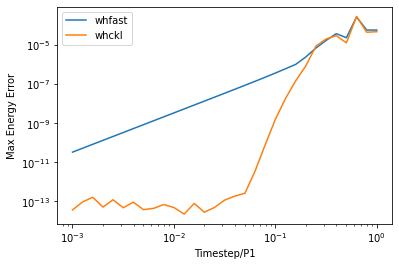

In [4]:
plt.plot(dt_samples,Emax_wh,label='whfast')
plt.plot(dt_samples,Emax_whckl,label='whckl')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('Max Energy Error')
plt.xlabel('Timestep/P1')

Text(0.5, 0, 'Timestep/P1')

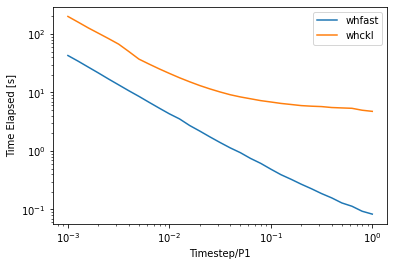

In [7]:
plt.plot(dt_samples,tcpu_wh,label='whfast')
plt.plot(dt_samples,tcpu_whckl,label='whckl')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('Time Elapsed [s]')
plt.xlabel('Timestep/P1')

In [18]:
dts = [0.1,0.03,0.01,0.003,0.001]
runs = list(range(10))

dt01 = np.array([np.nan,np.nan,0,np.nan])
dt05 = np.array([np.nan,np.nan,0,np.nan])
dt005 = np.array([np.nan,np.nan,0,np.nan])
dt001 = np.array([np.nan,np.nan,0,np.nan])
dt0005 = np.array([np.nan,np.nan,0,np.nan])
dt0001 = np.array([np.nan,np.nan,0,np.nan])

for run in runs:
    dt05 = np.vstack((dt05,np.loadtxt('results/testout_hb_{}_{}.txt'.format(0.05,run))))
    dt01 = np.vstack((dt01,np.loadtxt('results/testout_hb_{}_{}.txt'.format(0.01,run))))
    dt005 = np.vstack((dt005,np.loadtxt('results/testout_hb_{}_{}.txt'.format(0.005,run))))
    dt001 = np.vstack((dt001,np.loadtxt('results/testout_hb_{}_{}.txt'.format(0.001,run))))
    # dt0005 = np.vstack((dt0005,np.loadtxt('results/testout_{}_{}.txt'.format(0.0005,run))))
    # try:
    #     dt0001 = np.vstack((dt0001,np.loadtxt('results/testout_{}_{}.txt'.format(0.0001,run))))
    # except:
    #     dt0001 = np.vstack((dt0001,np.array([np.nan,np.nan,0,np.nan])))

In [3]:
runs = list(range(20))
dt = np.array([np.nan,np.nan,np.nan,0,np.nan])
for run in runs:
    dt = np.vstack((dt,np.loadtxt('results/testout_hb_{}.txt'.format(run))))

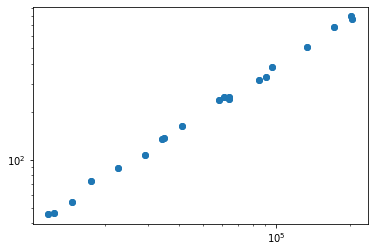

In [5]:
plt.scatter(dt[:,2],dt[:,4])
plt.xscale('log')
plt.yscale('log')

In [10]:
np.loadtxt('results/testout_hb_{}_{}.txt'.format(0.05,5))[0]

1.2566283536825789

In [19]:
dts = [0.1,0.03,0.01,0.003,0.001]
runs = list(range(10))

dtckl01 = np.array([np.nan,np.nan,0,np.nan])
dtckl05 = np.array([np.nan,np.nan,0,np.nan])
dtckl005 = np.array([np.nan,np.nan,0,np.nan])
dtckl001 = np.array([np.nan,np.nan,0,np.nan])

for run in runs:
    dtckl05 = np.vstack((dtckl05,np.loadtxt('results/testout_hb_whckl_{}_{}.txt'.format(0.05,run))))
    dtckl01 = np.vstack((dtckl01,np.loadtxt('results/testout_hb_whckl_{}_{}.txt'.format(0.01,run))))
    dtckl005 = np.vstack((dtckl005,np.loadtxt('results/testout_hb_whckl_{}_{}.txt'.format(0.005,run))))
    dtckl001 = np.vstack((dtckl001,np.loadtxt('results/testout_hb_whckl_{}_{}.txt'.format(0.001,run))))

In [20]:
from matplotlib.colors import ListedColormap

# make the color map:
cmp = ListedColormap(['green','black', 'red', 'blue'])

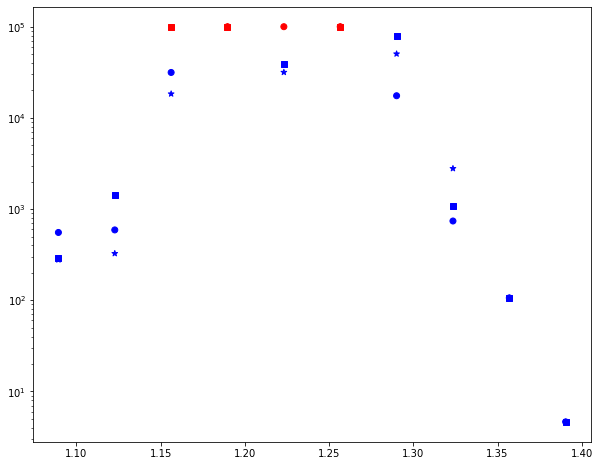

In [25]:
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(dt01[:,0],dt01[:,1],c=dt01[:,2],cmap=cmp,vmin=-1, vmax=2)
plt.scatter(dt005[:,0],dt005[:,1],c=dt005[:,2],marker='s',cmap=cmp,vmin=-1, vmax=2)
plt.scatter(dt001[:,0],dt001[:,1],c=dt001[:,2],marker='*',cmap=cmp,vmin=-1, vmax=2)
plt.yscale('log')

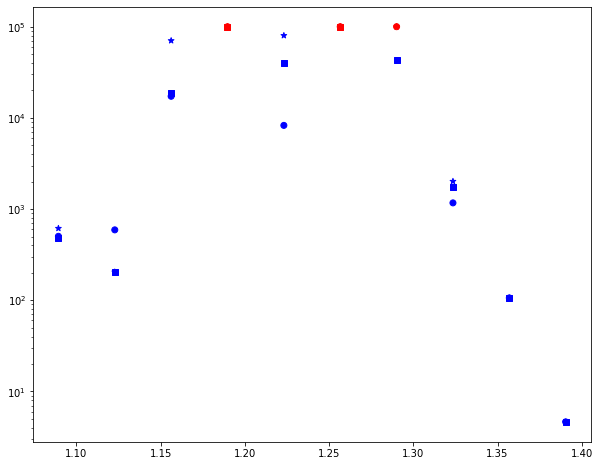

In [26]:
fig,ax = plt.subplots(figsize=(10,8))
#plt.scatter(dtckl05[:,0],dtckl05[:,1],c=dtckl05[:,2],cmap=cmp,vmin=0, vmax=2)
plt.scatter(dtckl01[:,0],dtckl01[:,1],c=dtckl01[:,2],cmap=cmp,vmin=-1, vmax=2)
plt.scatter(dtckl005[:,0],dtckl005[:,1],c=dtckl005[:,2],marker='s',cmap=cmp,vmin=-1, vmax=2)
plt.scatter(dtckl001[:,0],dtckl001[:,1],c=dtckl001[:,2],marker='*',cmap=cmp,vmin=-1, vmax=2)
plt.yscale('log')

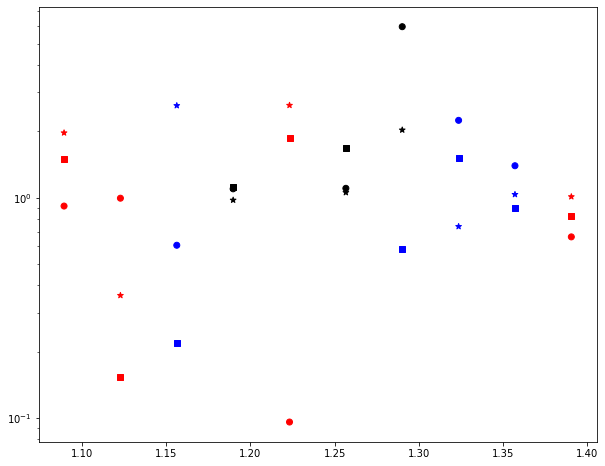

In [24]:
fig,ax = plt.subplots(figsize=(10,8))
#plt.scatter(dtckl05[:,0],dtckl05[:,1],c=dtckl05[:,2],cmap=cmp,vmin=0, vmax=2)
plt.scatter(dtckl01[:,0],dtckl01[:,3]/dt01[:,3],c=dtckl01[:,2],cmap=cmp,vmin=-1, vmax=2)
plt.scatter(dtckl005[:,0],dtckl005[:,3]/dt005[:,3],c=dtckl005[:,2],marker='s',cmap=cmp,vmin=-1, vmax=2)
plt.scatter(dtckl001[:,0],dtckl001[:,3]/dt001[:,3],c=dtckl001[:,2],marker='*',cmap=cmp,vmin=-1, vmax=2)
plt.yscale('log')

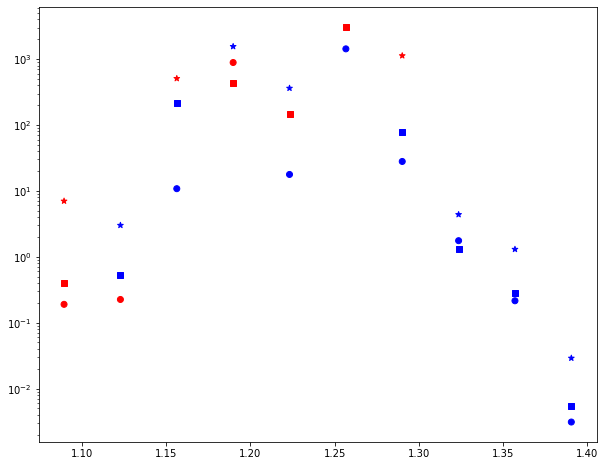

In [11]:
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(dt001[:,0],dt001[:,3],c=dt001[:,2],cmap=cmp,vmin=0, vmax=2)
plt.scatter(dt0005[:,0],dt0005[:,3],c=dt0005[:,2],marker='s',cmap=cmp,vmin=0, vmax=2)
plt.scatter(dt0001[:,0],dt0001[:,3],c=dt0001[:,2],marker='*',cmap=cmp,vmin=0, vmax=2)
plt.yscale('log')